In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Loading data
df = pd.read_csv("/home/chandraatul1022/Capstone_project_2025/People_personality_type_data_Train.csv")

df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP


In [3]:
# Checking the missing Values
print("\n Missing Data Analysis - Training data")
print("-" * 25)
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

print(missing_summary)

# Checking Duplicate data

print("\n\n Duplicate Data Analysis - Training data")
print("-" * 25)
duplicated_data = df.duplicated().sum()
print("Duplicate values - ", duplicated_data)

df.drop_duplicates(inplace=True)
duplicated_data = df.duplicated().sum()
print("Duplicate values after cleaning - ", duplicated_data)

print("\n\n Data info")
print("-" * 25)
df.info()


 Missing Data Analysis - Training data
-------------------------
                    Missing Count  Missing Percentage
Age                             0                 0.0
Gender                          0                 0.0
Education                       0                 0.0
Introversion Score              0                 0.0
Sensing Score                   0                 0.0
Thinking Score                  0                 0.0
Judging Score                   0                 0.0
Interest                        0                 0.0
Personality                     0                 0.0


 Duplicate Data Analysis - Training data
-------------------------
Duplicate values -  704
Duplicate values after cleaning -  0


 Data info
-------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33796 entries, 0 to 34499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age           

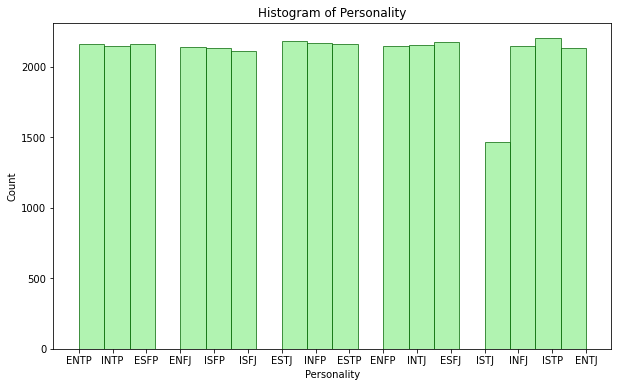

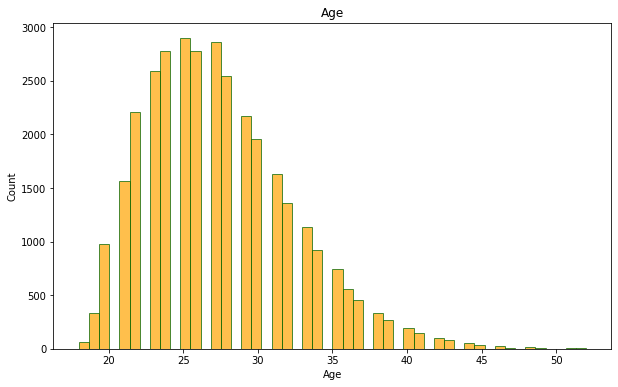

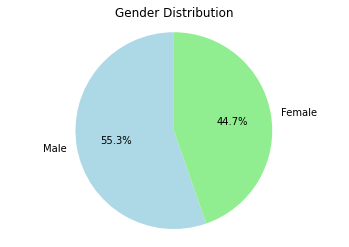

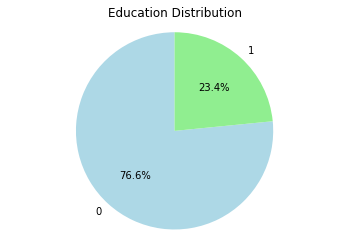

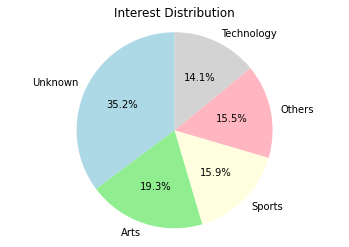

In [4]:
# Data analysis

#Personality type Graph#   
plt.figure(figsize=(10, 6))
plt.hist(df["Personality"], bins=20, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
plt.xlabel("Personality")
plt.ylabel("Count")
plt.title("Histogram of Personality")
plt.show()

#Age type Graph# 
plt.figure(figsize=(10, 6))
plt.hist(df["Age"], bins=50, color='orange', edgecolor='darkgreen', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age")
plt.show()


#Gender type Graph# 
gender_value = df["Gender"].value_counts()
fig, ax = plt.subplots()
ax.pie(
    gender_value,
    labels=gender_value.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightgreen']  # New color palette
)

ax.axis('equal')

plt.title('Gender Distribution')
plt.show()  


#Education type Graph# 
gender_value = df["Education"].value_counts()
fig, ax = plt.subplots()
ax.pie(
    gender_value,
    labels=gender_value.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightgreen']  # New color palette
)

ax.axis('equal')

plt.title('Education Distribution')
plt.show()  

#Interest type Graph# 
gender_value = df["Interest"].value_counts()
fig, ax = plt.subplots()
ax.pie(
    gender_value,
    labels=gender_value.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightgreen','lightyellow','lightpink','lightgrey']  # New color palette
)

ax.axis('equal')

plt.title('Interest Distribution')
plt.show() 



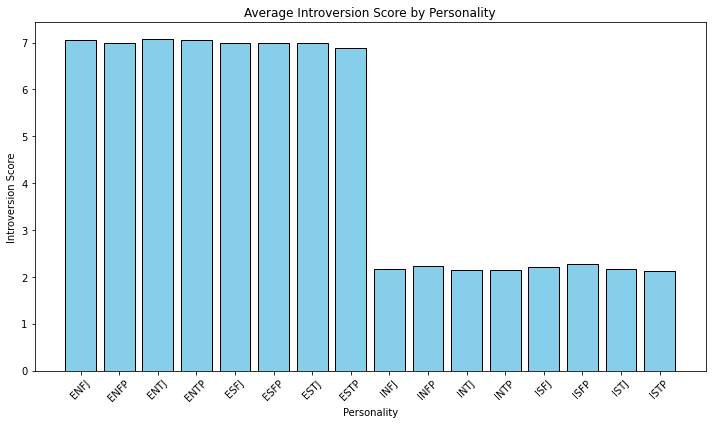

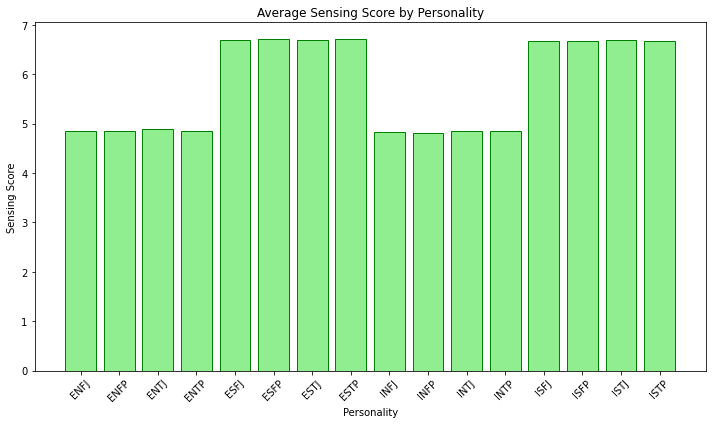

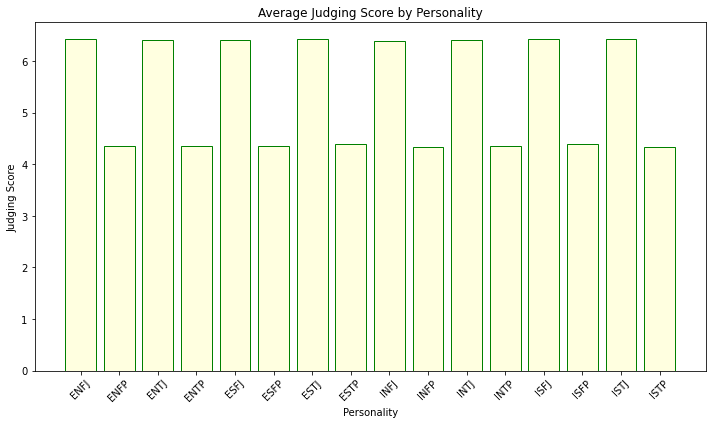

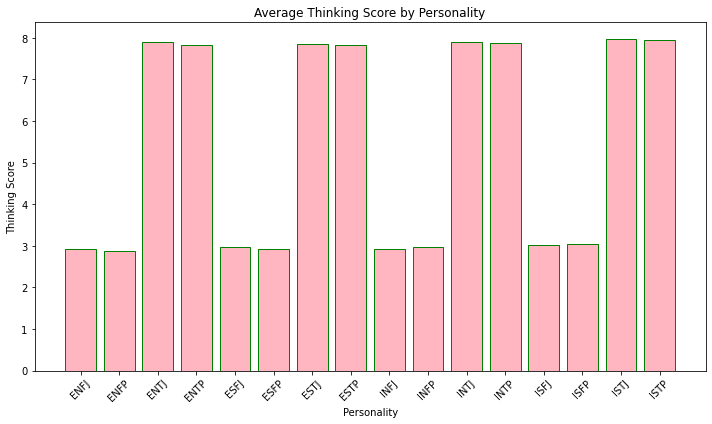

In [6]:
#Graph - Group by Personality and Introversion Score# 
avg_scores = df.groupby("Personality")["Introversion Score"].mean()
plt.figure(figsize=(10,6))
plt.bar(avg_scores.index, avg_scores.values, color='skyblue', edgecolor='black')
plt.title("Average Introversion Score by Personality")
plt.xlabel("Personality")
plt.ylabel("Introversion Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Graph - Group by Personality and Sensing Score# 
avg_scores = df.groupby("Personality")["Sensing Score"].mean()
plt.figure(figsize=(10,6))
plt.bar(avg_scores.index, avg_scores.values, color='lightgreen', edgecolor='green')
plt.title("Average Sensing Score by Personality")
plt.xlabel("Personality")
plt.ylabel("Sensing Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Graph - Group by Personality and Judging Score# 
avg_scores = df.groupby("Personality")["Judging Score"].mean()
plt.figure(figsize=(10,6))
plt.bar(avg_scores.index, avg_scores.values, color='lightyellow', edgecolor='green')
plt.title("Average Judging Score by Personality")
plt.xlabel("Personality")
plt.ylabel("Judging Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Graph - Group by Personality and Thinking Score# 
avg_scores = df.groupby("Personality")["Thinking Score"].mean()
plt.figure(figsize=(10,6))
plt.bar(avg_scores.index, avg_scores.values, color='lightpink', edgecolor='green')
plt.title("Average Thinking Score by Personality")
plt.xlabel("Personality")
plt.ylabel("Thinking Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
#label encoding#

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
        
df.info()
df.head()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33796 entries, 0 to 34499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 33796 non-null  int64  
 1   Gender              33796 non-null  int64  
 2   Education           33796 non-null  int64  
 3   Introversion Score  33796 non-null  float64
 4   Sensing Score       33796 non-null  float64
 5   Thinking Score      33796 non-null  float64
 6   Judging Score       33796 non-null  float64
 7   Interest            33796 non-null  int64  
 8   Personality         33796 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 2.6 MB


,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21,0,1,5.89208,2.144395,7.32363,5.462224,0,3
1,24,0,1,2.48366,3.206188,8.06876,3.765012,4,11
2,26,0,1,7.02910,6.469302,4.16472,5.454442,1,5
3,30,1,0,5.46525,4.179244,2.82487,5.080477,2,0
4,31,0,0,3.59804,6.189259,5.31347,3.677984,1,13


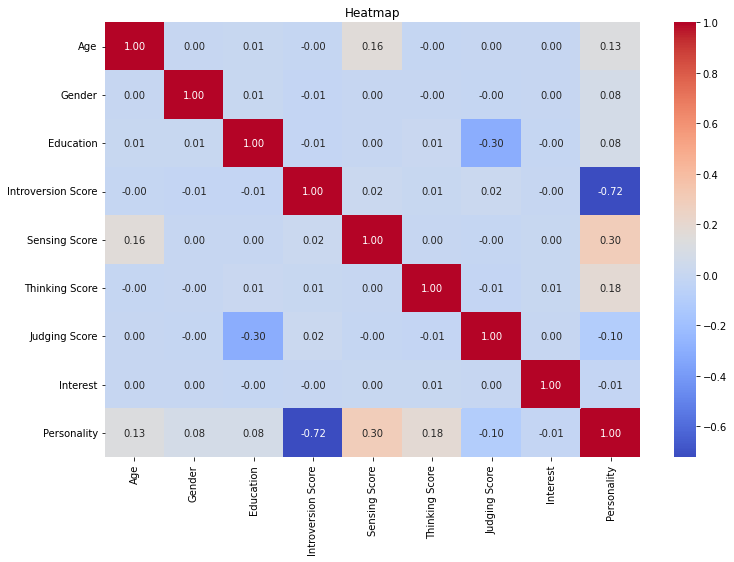

In [8]:
# correlation of feartures with Personality 
import seaborn as sns
corr_matrix = df.corr()
corr_matrix["Personality"].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap")
plt.show()

In [6]:
scaler = StandardScaler()
scaler.fit(df)
data_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(data_scaled, columns=df.columns)
df_scaled.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,-1.309609,-1.112986,1.807085,0.430539,-2.898363,0.671141,0.068038,-1.491080,-0.958930
1,-0.697788,-1.112986,1.807085,-0.745121,-2.046895,0.927742,-1.102455,1.098332,0.795058
2,-0.289907,-1.112986,1.807085,0.822729,0.569842,-0.416698,0.062671,-0.843727,-0.520433
3,0.525854,0.898484,-0.553377,0.283313,-1.266588,-0.878104,-0.195236,-0.196374,-1.616675
4,0.729794,-1.112986,-0.553377,-0.360740,0.345272,-0.021101,-1.162474,-0.843727,1.233555


In [7]:
# Spliting the data set #

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict


X = df_scaled.drop(['Personality'],axis = 1)
y = df['Personality']
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size = 0.2 ,random_state = 42)



# Softmax model

from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(
    multi_class='multinomial',   # enables softmax instead of one-vs-rest
    solver='lbfgs',              # recommended solver for softmax
    max_iter=1000,               # increase if convergence warning appears
    C = 1,                      # L2 regularization
    random_state=42
)


print(X_train)
print(y_train)

# Fit the model
softmax_reg.fit(X_train, y_train)


# Predict Personality Type
y_train_pred = softmax_reg.predict(X_train)
y_test_pred = softmax_reg.predict(X_test)

# Predict Personality Type probabilities (softmax output)
y_train_prob = softmax_reg.predict_proba(X_train)
y_test_prob = softmax_reg.predict_proba(X_test)

sm_pred = softmax_reg.predict(X_train.iloc[[1]])
sm_prob = softmax_reg.predict_proba(X_train.iloc[[1]])
sm_actual = y_train.iloc[[1]]

print("\n\n")
print("Personality(predicted) : ", sm_pred)
print("\nPersonality(actual) : ", sm_actual)
print("\nPersonality(probabilities) : ", sm_prob)


            Age    Gender  Education  Introversion Score  Sensing Score  \
6453  -1.105668  0.898484  -0.553377           -0.038495      -0.368648   
28347 -1.309609 -1.112986  -0.553377           -0.169757      -1.910208   
13340 -0.493847 -1.112986   1.807085           -1.356796       0.613181   
23547 -1.309609  0.898484  -0.553377           -0.948149      -0.765616   
12783 -1.105668 -1.112986  -0.553377            1.641968      -0.199079   
...         ...       ...        ...                 ...            ...   
16850 -0.901728 -1.112986  -0.553377            1.593440      -1.182904   
6265  -0.901728  0.898484  -0.553377           -1.141613       0.411362   
11284 -0.289907  0.898484   1.807085           -1.482143       0.326905   
860   -0.697788  0.898484  -0.553377            1.065531       0.482124   
15795 -0.901728  0.898484  -0.553377            0.099225      -0.056906   

       Thinking Score  Judging Score  Interest  
6453        -0.508625      -0.025799  1.098332  
2

In [10]:
# Cross validation #
scores_train = cross_val_score(softmax_reg, X_train, y_train, cv=3, scoring='accuracy')

print("Scores - Training data")
print("-"*25)
print("Cross-validation scores:", scores_train)
print("Mean accuracy:", np.mean(scores_train))


scores_test = cross_val_score(softmax_reg, X_test, y_test, cv=3, scoring='accuracy')
print("\n\nScores - Test data")
print("-"*25)
print("Cross-validation scores:", scores_test)
print("Mean accuracy:", np.mean(scores_test))

Scores - Training data
-------------------------
Cross-validation scores: [0.77385708 0.78184643 0.79083444]
Mean accuracy: 0.782179316466933


Scores - Test data
-------------------------
Cross-validation scores: [0.78172138 0.76653351 0.78339991]
Mean accuracy: 0.777218268769906


              precision    recall  f1-score   support

           0       0.78      0.75      0.76       387
           1       0.85      0.75      0.80       436
           2       0.81      0.73      0.77       451
           3       0.82      0.74      0.78       431
           4       0.77      0.81      0.79       438
           5       0.79      0.78      0.79       440
           6       0.77      0.83      0.80       429
           7       0.77      0.78      0.78       431
           8       0.78      0.76      0.77       434
           9       0.83      0.77      0.80       422
          10       0.74      0.77      0.75       419
          11       0.80      0.78      0.79       453
          12       0.74      0.82      0.78       419
          13       0.72      0.79      0.75       424
          14       0.75      0.77      0.76       304
          15       0.76      0.82      0.79       442

    accuracy                           0.78      6760
   macro avg       0.78   

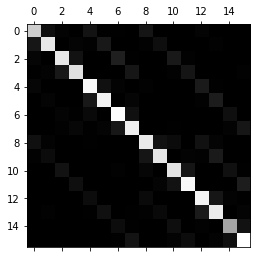

Most values are on the main diagonal, which means that they were classified correctly.


In [13]:
#Confusion Matrix#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report as rep

print(rep(y_test, y_test_pred))

#print(y_train)

#print("Confusion Matrix -- \n", confusion_matrix(y_train, y_train_pred))
print("Confusion Matrix -- \n", confusion_matrix(y_test, y_test_pred))
plt.matshow(confusion_matrix(y_test, y_test_pred), cmap=plt.cm.gray)
plt.show()
print("Most values are on the main diagonal, which means that they were classified correctly.")

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)



for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7784023668639053
RandomForestClassifier 0.8928994082840237
SVC 0.8214497041420118
VotingClassifier 0.8418639053254438


In [10]:
from sklearn.ensemble import RandomForestClassifier

#rnd_clf = RandomForestClassifier(n_estimators=1000, oob_score=True, max_leaf_nodes=10, n_jobs=-1, random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

rnd_clf.oob_score_
rnd_clf.feature_importances_

for name, score in zip(X_train, rnd_clf.feature_importances_):
    print(name, score)

Age 0.051289602618448525
Gender 0.017739156222408563
Education 0.04648168250033053
Introversion Score 0.23365848159402217
Sensing Score 0.18560913067293447
Thinking Score 0.21757656988398752
Judging Score 0.19582003097844852
Interest 0.05182534552941973


In [14]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20]
}
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [15]:
var_best_param = grid.best_params_
var_best_score = grid.best_score_

print("Best Param: ", var_best_param)
print("\nBest Score: ", var_best_score*100,"%")

Best Param:  {'max_depth': 15, 'n_estimators': 400}

Best Score:  89.52507767421216 %


In [11]:
#Random Forest Classifier#
n_estimators_list = [5, 10, 20, 50, 100, 200, 300, 400]
accuracy_scores = []

for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, max_depth = 15,  random_state=42)
    model.fit(X_train, y_train)
    y_pred_rfc = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_rfc)
    accuracy_scores.append(acc)

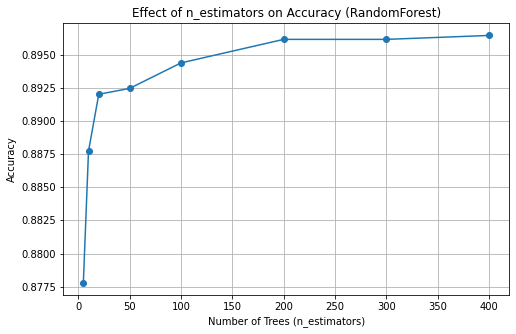

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, accuracy_scores, marker='o')
plt.title("Effect of n_estimators on Accuracy (RandomForest)")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

Random Forest - Precision vs Recall vs F1 Score
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       387
           1       0.93      0.88      0.90       436
           2       0.92      0.85      0.88       451
           3       0.94      0.85      0.90       431
           4       0.92      0.89      0.91       438
           5       0.88      0.90      0.89       440
           6       0.91      0.93      0.92       429
           7       0.90      0.89      0.89       431
           8       0.90      0.91      0.91       434
           9       0.91      0.89      0.90       422
          10       0.88      0.90      0.89       419
          11       0.91      0.90      0.90       453
          12       0.88      0.94      0.91       419
          13       0.83      0.92      0.87       424
          14       0.89      0.91      0.90       304
          1

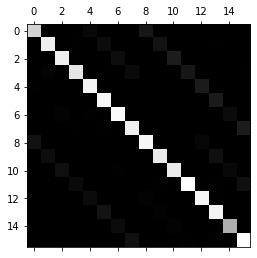

SVM - Precision vs Recall vs F1 Score
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       387
           1       0.90      0.74      0.81       436
           2       0.83      0.80      0.81       451
           3       0.86      0.75      0.80       431
           4       0.81      0.86      0.84       438
           5       0.85      0.81      0.83       440
           6       0.81      0.90      0.86       429
           7       0.82      0.83      0.82       431
           8       0.85      0.84      0.85       434
           9       0.87      0.75      0.80       422
          10       0.79      0.85      0.82       419
          11       0.86      0.81      0.83       453
          12       0.75      0.90      0.82       419
          13       0.78      0.79      0.79       424
          14       0.76      0.85      0.80       304
          15       0.

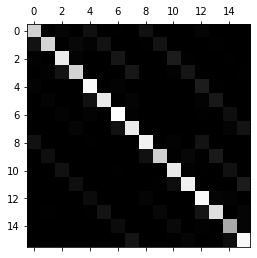

In [14]:
# Random Forest - Precision vs Recall vs F1 Score
print("Random Forest - Precision vs Recall vs F1 Score")
print('-'*75)
print(rep(y_test, y_pred_rfc))
print('-'*75)
plt.matshow(confusion_matrix(y_test, y_pred_rfc), cmap=plt.cm.gray)
plt.show()


# SVM - Precision vs Recall vs F1 Score
y_pred_svm = svm_clf.predict(X_test)
print("SVM - Precision vs Recall vs F1 Score")
print('-'*75)
print(rep(y_test, y_pred_svm))
print('-'*75)
plt.matshow(confusion_matrix(y_test, y_pred_svm), cmap=plt.cm.gray)
plt.show()

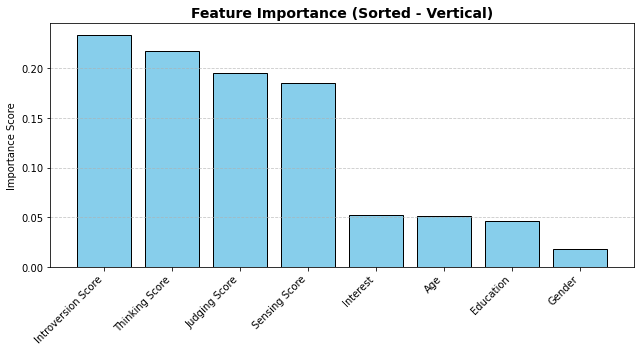

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data
features = [
    'Age', 'Gender', 'Education', 'Introversion Score',
    'Sensing Score', 'Thinking Score', 'Judging Score', 'Interest'
]

importance = [
    0.051289602618448525, 0.017739156222408563, 0.04648168250033053,
    0.23365848159402217, 0.18560913067293447, 0.21757656988398752,
    0.19582003097844852, 0.05182534552941973
]

# Sort data by importance (descending)
sorted_indices = np.argsort(importance)[::-1]
features_sorted = [features[i] for i in sorted_indices]
importance_sorted = [importance[i] for i in sorted_indices]

# Plot
plt.figure(figsize=(9,5))
bars = plt.bar(features_sorted, importance_sorted, color='skyblue', edgecolor='black')

plt.title('Feature Importance (Sorted - Vertical)', fontsize=14, fontweight='bold')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()